In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [7]:
col_dtypes = {'unique_id': 'category',
              'y': int}
df = pd.read_csv('../data/processed/subgrups-dataset.csv', encoding='utf8', dtype=col_dtypes)
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,unique_id,y
0,2018-01-01,0101,0
1,2018-02-01,0101,20
2,2018-03-01,0101,1
3,2018-04-01,0101,40
4,2018-05-01,0101,6


In [8]:
print(df.dtypes)

ds           datetime64[ns]
unique_id          category
y                     int32
dtype: object


c:\Users\brvn\AppData\Local\anaconda3\envs\meutcc\Lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


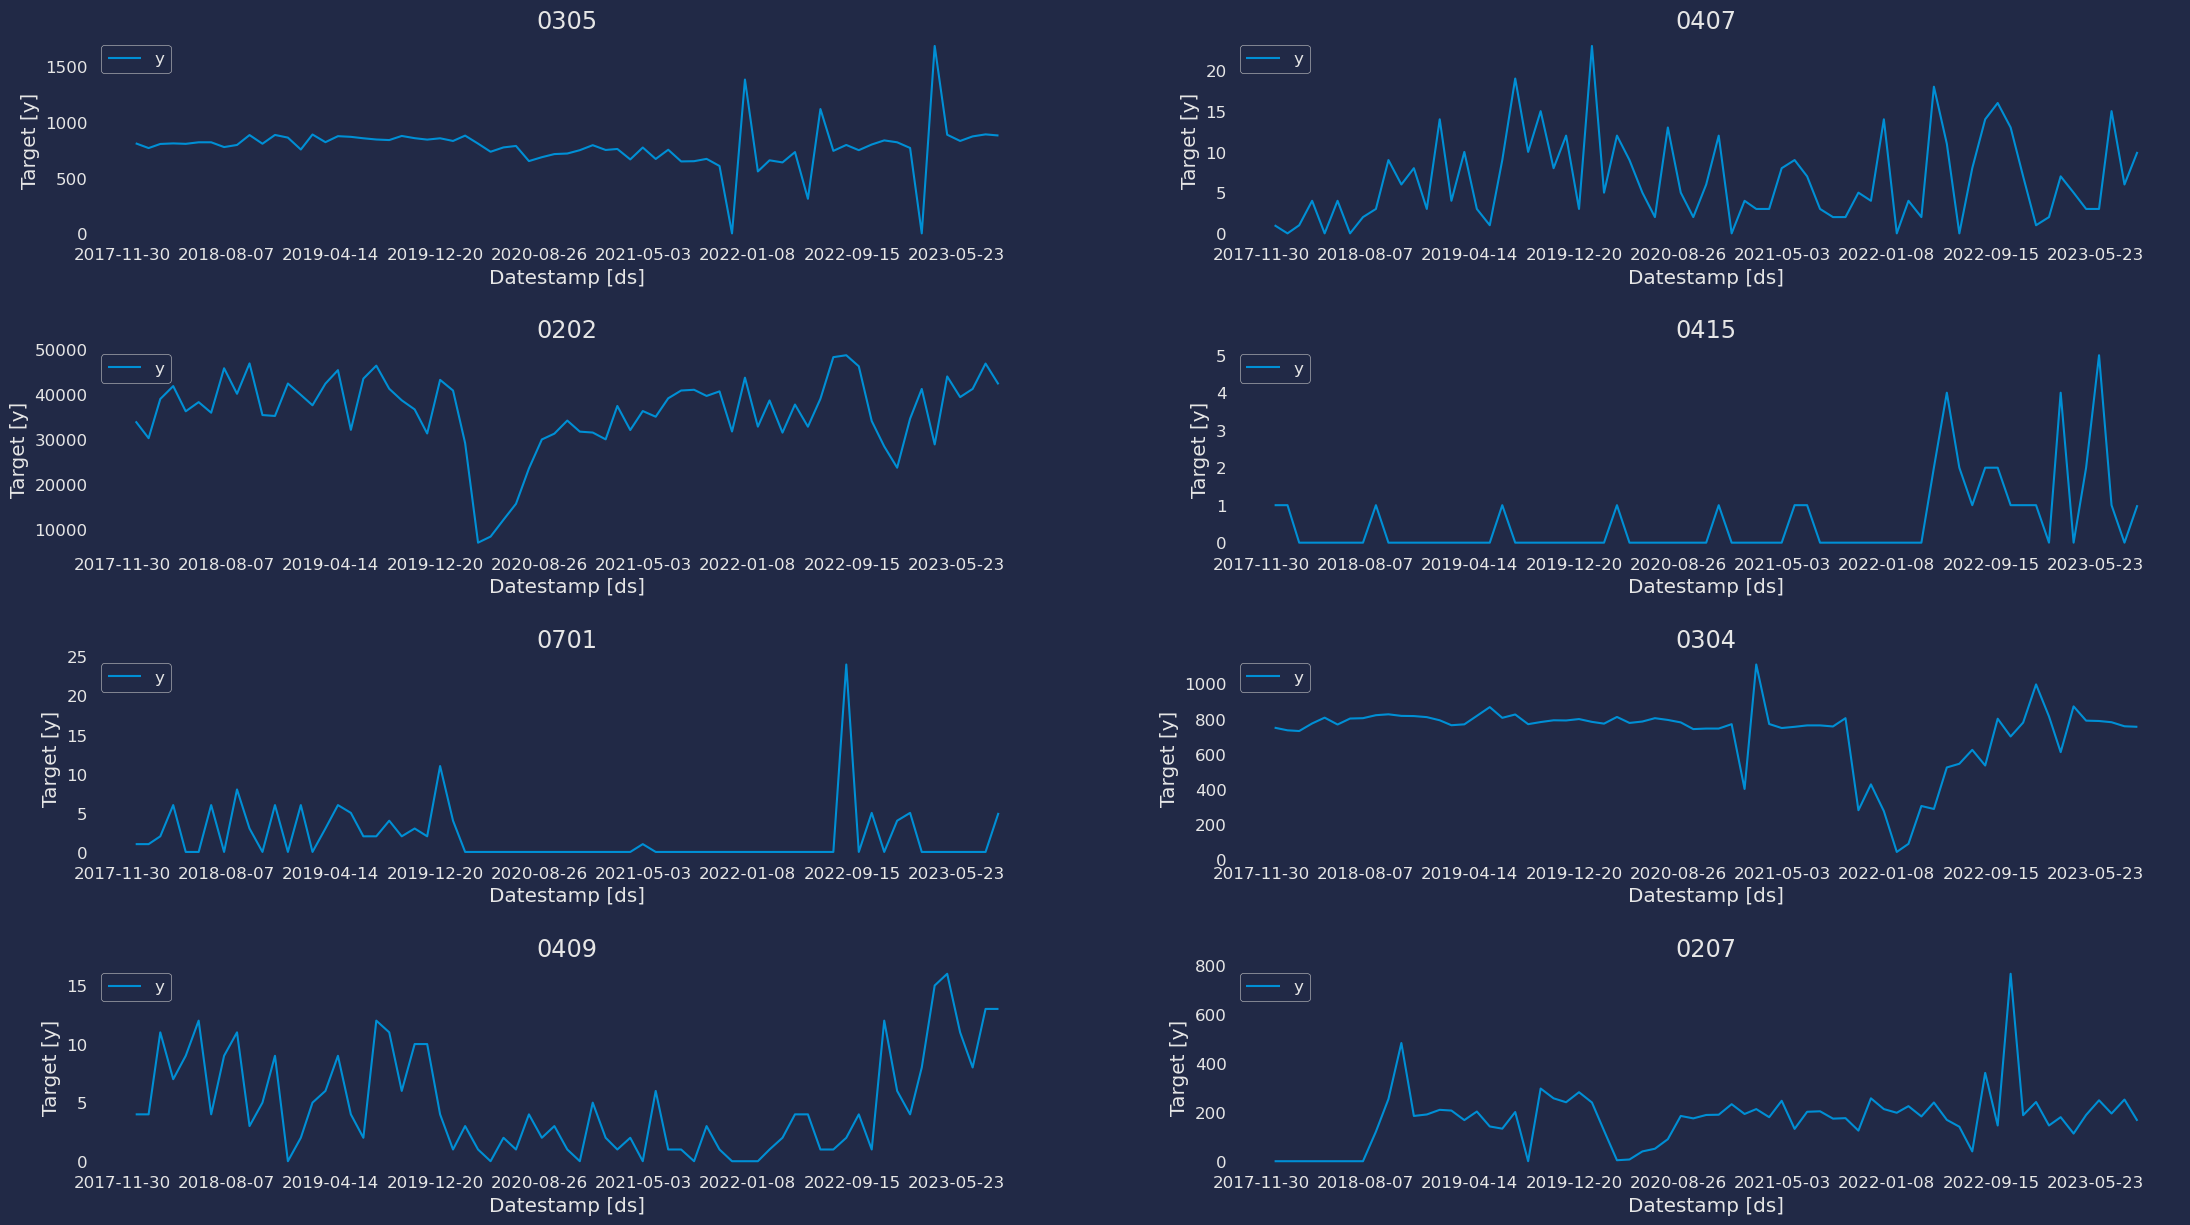

In [9]:
from statsforecast import StatsForecast

StatsForecast.plot(df, engine="matplotlib")

In [22]:
diagnosticos = df[df['unique_id'] == '0202'].copy()
diagnosticos.reset_index(drop=True, inplace=True)
diagnosticos

,ds,unique_id,y
0,2018-01-01,0202,33990
1,2018-02-01,0202,30251
2,2018-03-01,0202,38960
3,2018-04-01,0202,41826
4,2018-05-01,0202,36223
...,...,...,...
64,2023-05-01,0202,43972
65,2023-06-01,0202,39382
66,2023-07-01,0202,41197
67,2023-08-01,0202,46833


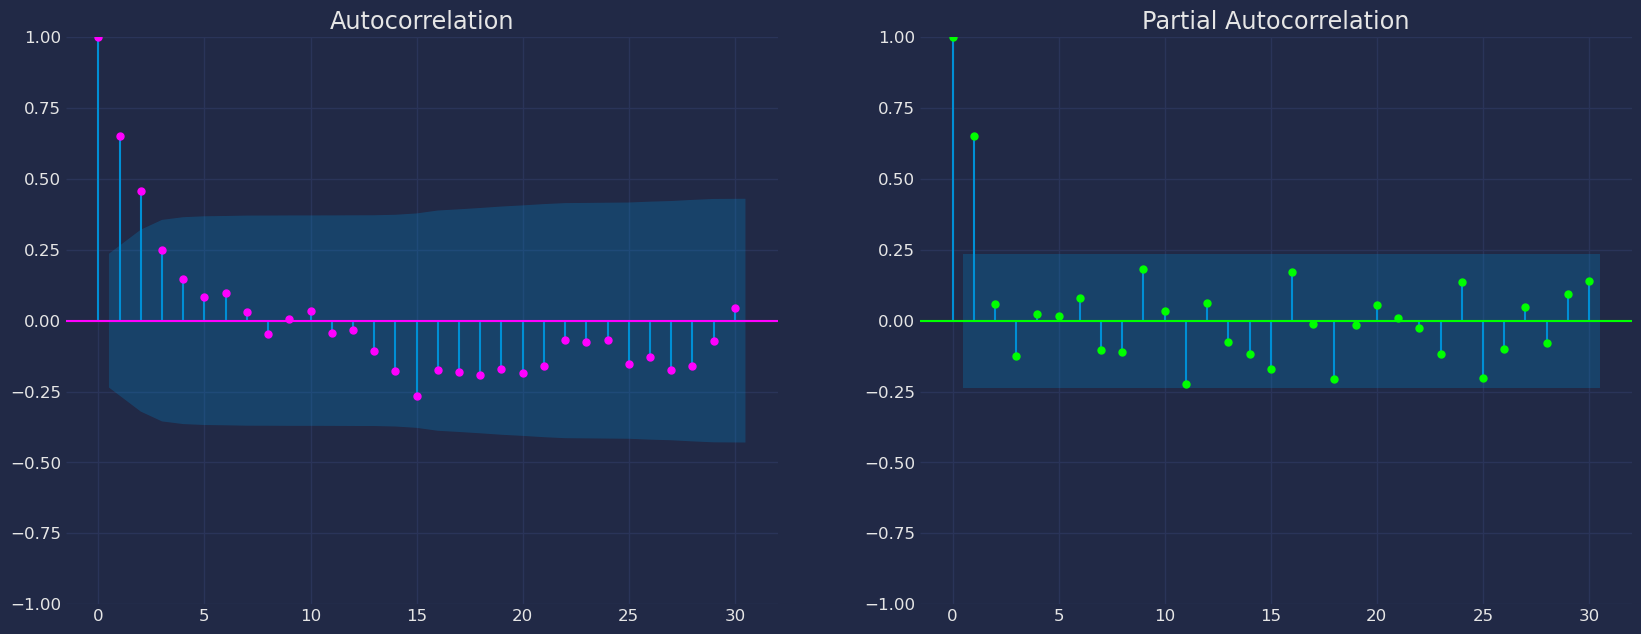

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2)

lags = 30

plot_acf(diagnosticos["y"],  lags=lags, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(diagnosticos["y"],  lags=lags, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

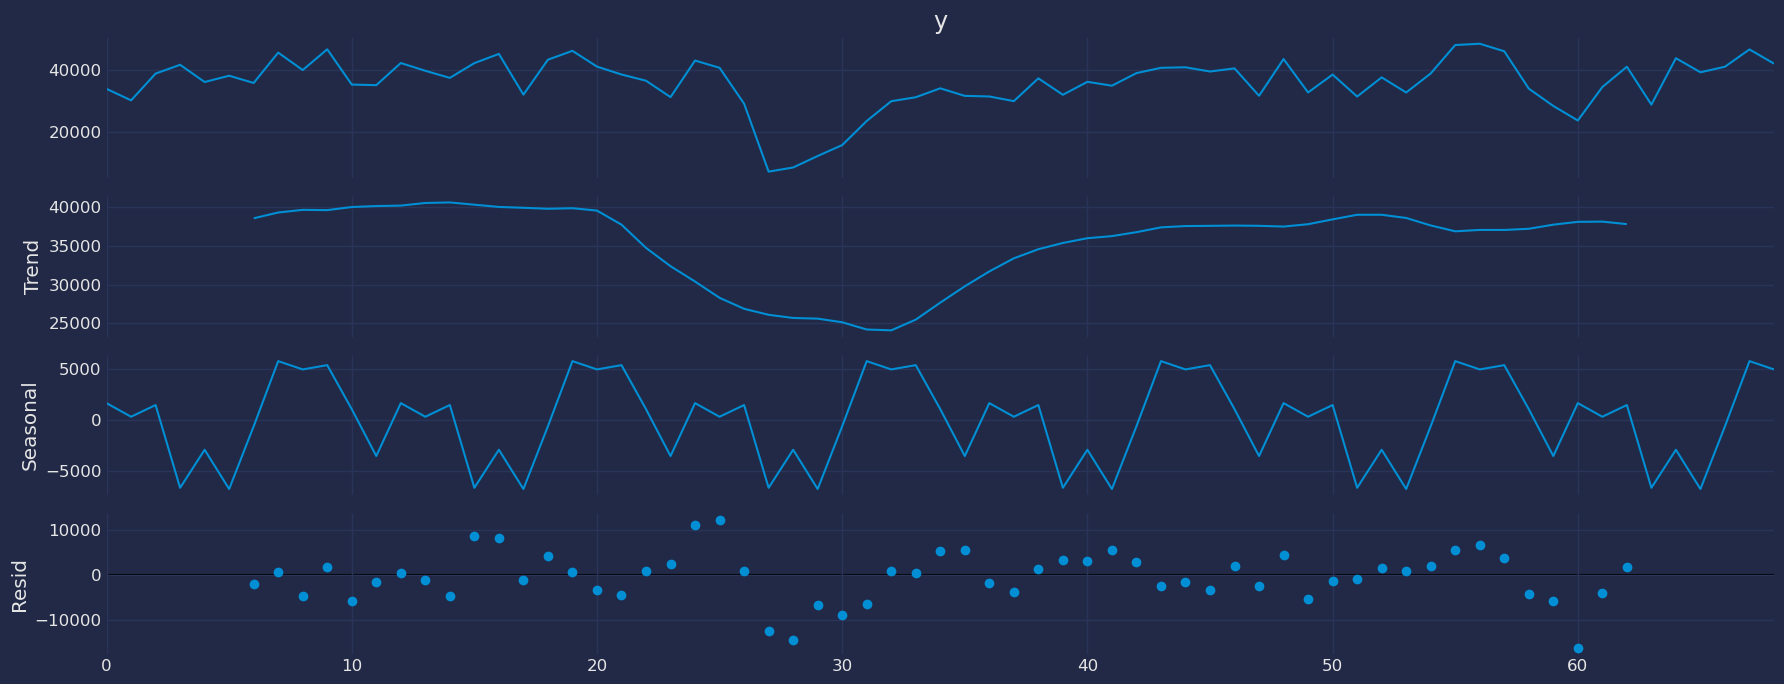

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(diagnosticos["y"], model = "add", period=12)
a.plot();

In [33]:
Y_train_df = diagnosticos[diagnosticos.ds<='2022-09-01'] 
Y_test_df = diagnosticos[diagnosticos.ds>'2022-09-01'] 

In [34]:
Y_train_df.shape, Y_test_df.shape

((57, 3), (12, 3))

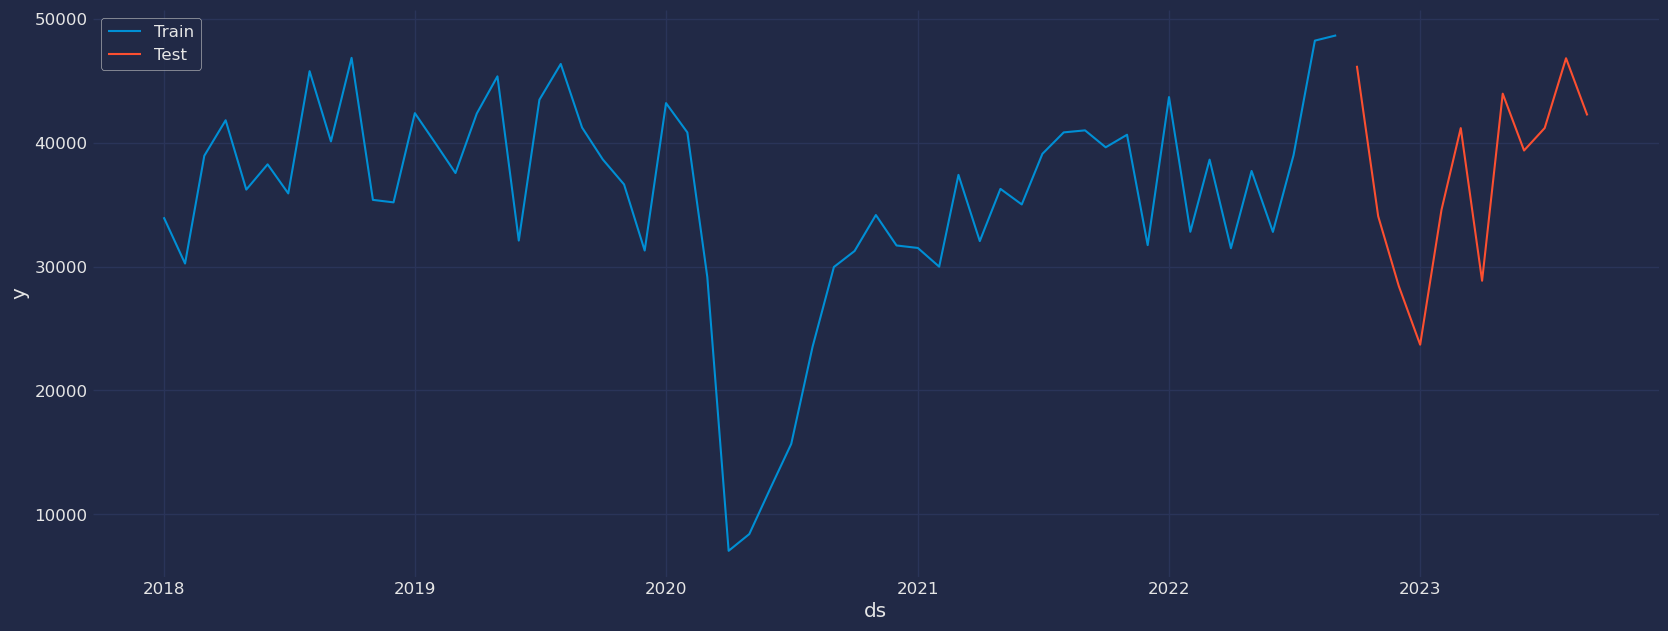

In [35]:
sns.lineplot(Y_train_df, x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [43]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoCES, AutoTheta, AutoETS
from statsforecast.arima import arima_string

Y_train_df = df[df.ds<='2022-09-01'] 
Y_test_df = df[df.ds>'2022-09-01']
Y_train_df.shape, Y_test_df.shape

((2337, 3), (492, 3))

In [44]:
season_length = 12 # Monthly data 
horizon = len(Y_test_df) # number of predictions

models = [AutoARIMA(season_length=season_length), AutoETS(season_length=season_length), AutoCES(season_length=season_length), AutoTheta(season_length=season_length)]

In [45]:
sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq='MS', 
                   n_jobs=-1)

In [46]:
sf.fit()

StatsForecast(models=[AutoARIMA,AutoETS,CES,AutoTheta])

In [47]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(0,1,2)(0,1,0)[12]                   '

In [11]:
X_df = df
X_df['LAG_1'] = df['y'].shift(1)
X_df['LAG_2'] = df['y'].shift(2)
X_df['LAG_3'] = df['y'].shift(3)
X_df

,LAG_1,LAG_2,LAG_3
0,NaN,NaN,NaN
1,0.0,NaN,NaN
2,20.0,0.0,NaN
3,1.0,20.0,0.0
4,40.0,1.0,20.0
...,...,...,...
2824,43.0,5.0,26.0
2825,55.0,43.0,5.0
2826,33.0,55.0,43.0
2827,27.0,33.0,55.0


In [ ]:
################################
# Dados de tempo e clima. 
# import requests

# url = "https://meteostat.p.rapidapi.com/stations/monthly"

# querystring = {"station":"10637","start":"2018-01-01","end":"2023-08-01","freq":"MS","units":"metric"}

# headers = {
# 	"X-RapidAPI-Key": "",
# 	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

In [ ]:
weather = pd.read_json("../data/raw/2018-2023-wheather.json")
